# BANK MARKETING CAMPAIGN MODEL

In [1]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.gridspec as gridspec


from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, log_loss,f1_score,precision_score,recall_score

from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier



from scipy.stats import skew
from scipy import stats
from sklearn.utils import resample


%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

from tabulate import tabulate
from IPython.display import display, HTML
js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
display(HTML(js))

In [2]:
# checking the data

data=pd.read_csv('bank-additional-full.csv',header=0)

In [3]:
data

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [4]:
data.columns

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')

The data is not cleaned lets clean the data first

## DATA CLEANING

In [5]:
# Spliting the data with a delimiter ;

data =data['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"']

data= data.str.split(';', expand=True)

data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [6]:
# Renaming the data columns with the appropriate columns  names

data.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [7]:
# Removing special character from the data columns

def replaceSpecialCharacters(str):
    return str.replace('"', '')

data = data.applymap(replaceSpecialCharacters)

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Nor our data is cleaned let's work on it

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null object
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null object
campaign          41188 non-null object
pdays             41188 non-null object
previous          41188 non-null object
poutcome          41188 non-null object
emp.var.rate      41188 non-null object
cons.price.idx    41188 non-null object
cons.conf.idx     41188 non-null object
euribor3m         41188 non-null object
nr.employed       41188 non-null object
y                 41188 non-null object
dtypes: object(21)
memory usage: 6.6+ MB


In [9]:
data.describe().T

,count,unique,top,freq
age,41188,78,31,1947
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623


In [10]:
# Change columns to the appropriate data type



num_cols=["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

int_cols=["age","duration","campaign","pdays","previous"]

for i in int_cols:
    data[i]=data[i].astype("int64")


float_cols=["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
for i in float_cols:
    data[i]=data[i].astype("float64")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
# checking for missing data
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

 No missing data !

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Interpretation

-age has a min and max that look reasonable
-balance looks right skewed
-day has a min and max that look reasonable
-campaign looks really skewed, need to look more at that
-pdays is right skewed, need to take care of that -1 value
-no null values in these features (look at 'count' for each feature)

In [14]:
cat_cols=data.select_dtypes(['object']).columns
print(cat_cols)

for i in (cat_cols):
    print( 'Categorical Column Name :-',i,'\n')
    print('No of Categories in :-',i,'\n' '\n',data[i].value_counts(), '\n')
    print('Percentage of Each Category in', i,'\n',data[i].value_counts(normalize =True).mul(100).round(2),'\n')

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Categorical Column Name :- job 

No of Categories in :- job 

 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

Percentage of Each Category in job 
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64 

Categorical Column Name :- marital 

No of Categories in :- marital 

 married     24928
single      11568
divorced     4612
unknown        80
N

Most categorical columns has unknown value which is not mornal for a bank record, I will consider them as missing data that will be deleted

In [15]:
#Dropping unknow values form dataset
data.drop(data[data['job'] == 'unknown' ].index , inplace=True)
data.drop(data[data['marital'] == 'unknown' ].index , inplace=True)
data.drop(data[data['education'] == 'unknown' ].index , inplace=True)
data.drop(data[data['default'] == 'unknown' ].index , inplace=True)
data.drop(data[data['housing'] == 'unknown' ].index , inplace=True)
data.drop(data[data['loan'] == 'unknown' ].index , inplace=True)

In [16]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


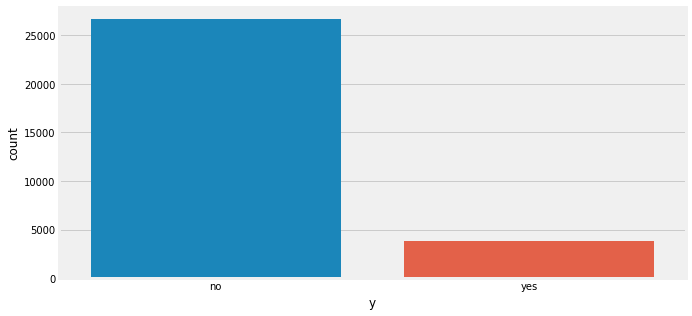

In [17]:
# target variable (y) visualization

plt.figure(figsize=(10,5))
sb.countplot(data.y)
plt.show()

our target variable is imbalanced.

In [18]:
# mapping all types of basic education into one 

print ("Before mapping: ",data['education'].value_counts() ,'\n''\n')



data['education'] = data['education'].map({'basic.9y':'basic','basic.6y':'basic','basic.4y':'basic', "university.degree": "university",
                                          "high.school":"HighSchool","professional.course":"professional","illiterate":"illiterate"})



print ("after mapping: ", data['education'].value_counts())



Before mapping:  university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64 


after mapping:  university      10412
basic            8045
HighSchool       7699
professional     4321
illiterate         11
Name: education, dtype: int64


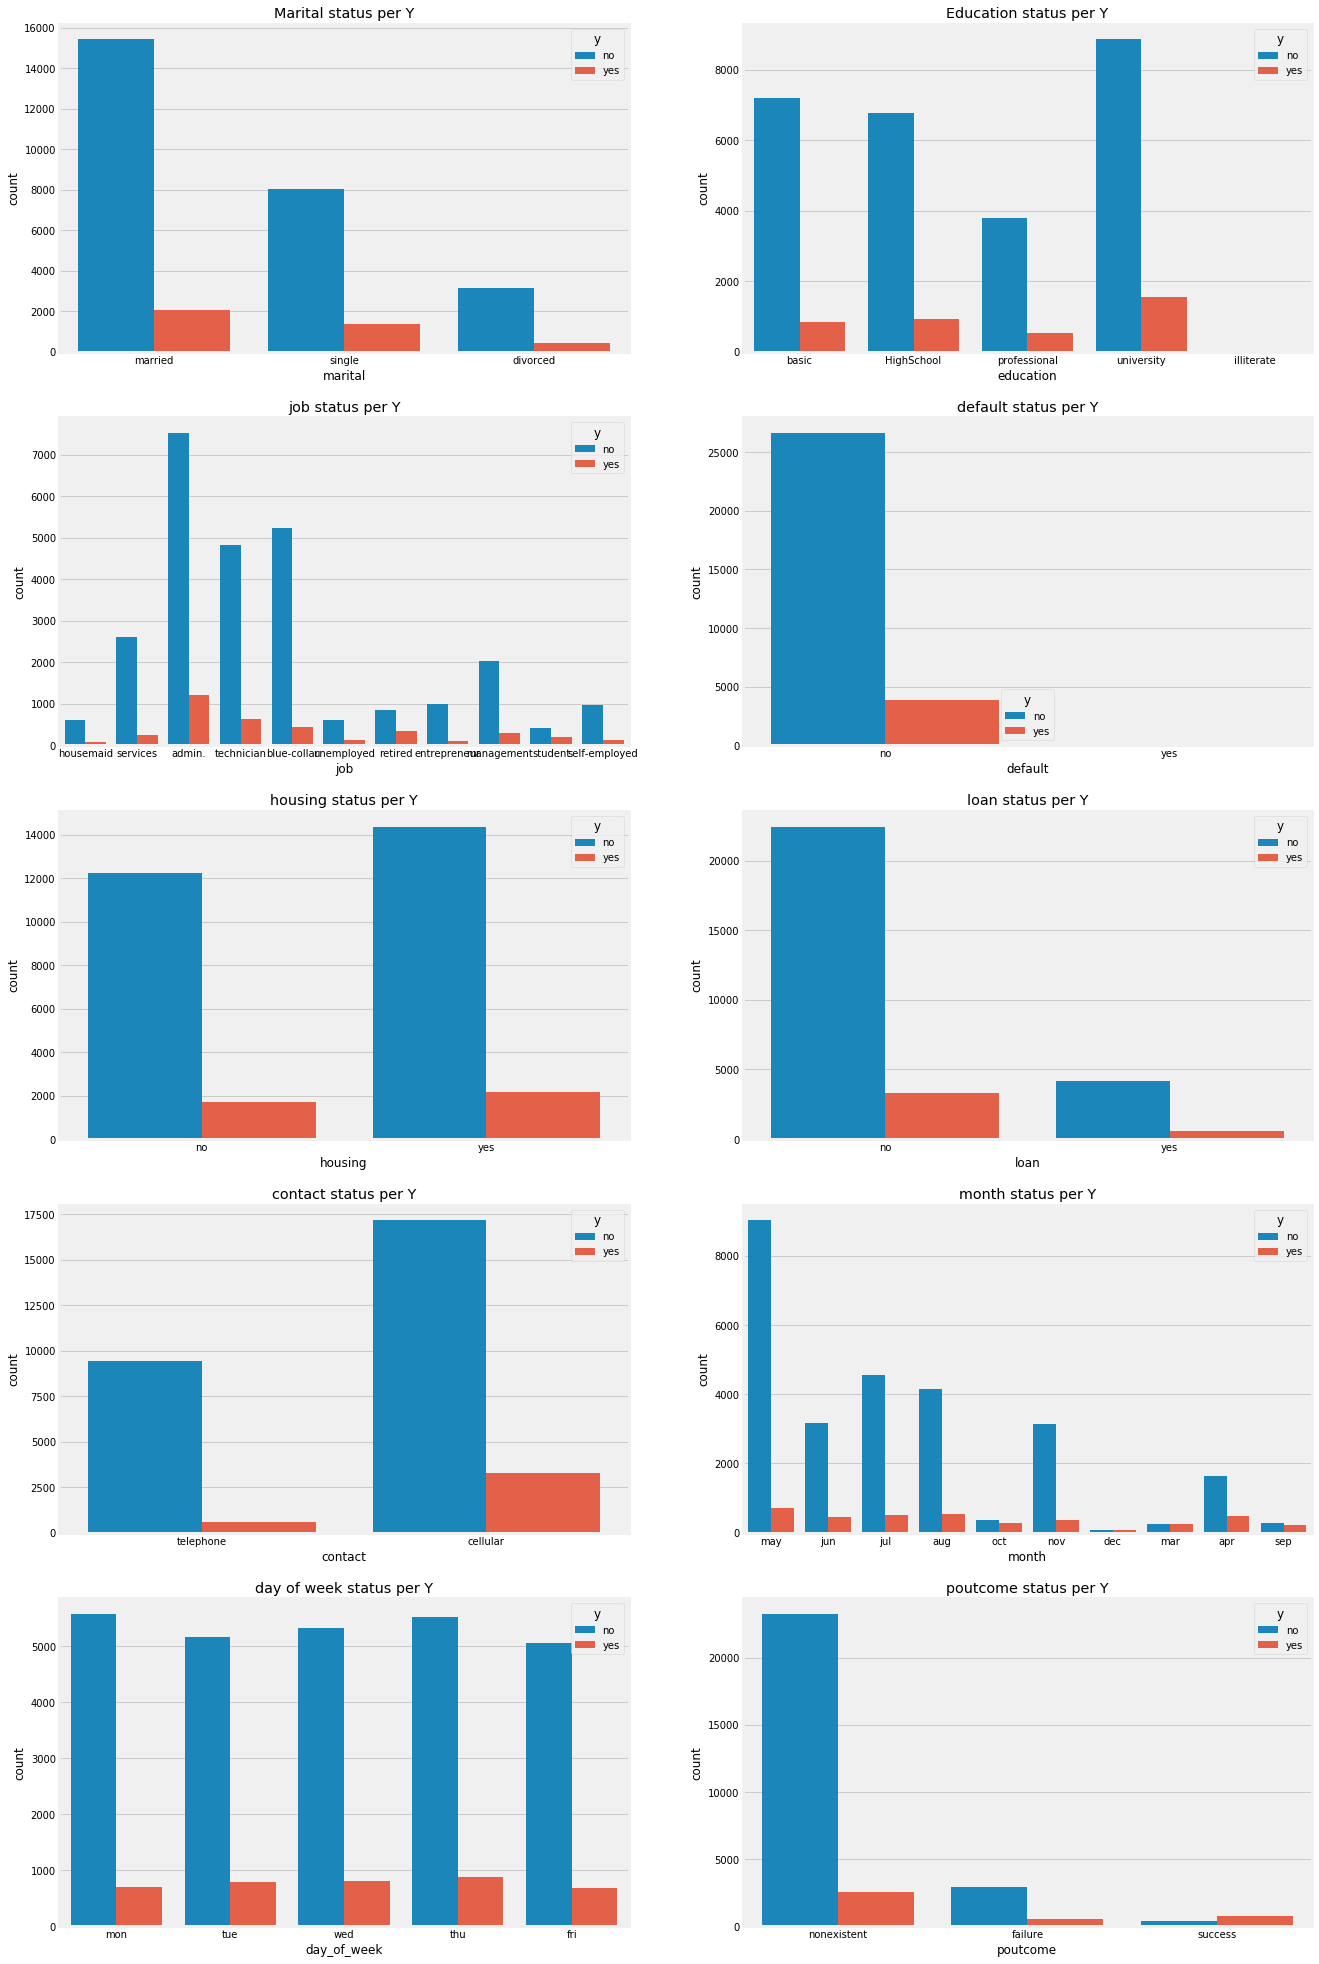

In [19]:
# Categorical varaiables visualization


plt.figure(figsize=(20,35))

plt.subplot(5,2,1)
plt.title('Marital status per Y')
sb.countplot(data.marital,hue='y',data=data)

plt.subplot(5,2,2)
plt.title('Education status per Y')
sb.countplot(data.education,hue='y',data=data)

plt.subplot(5,2,3)
plt.title('job status per Y')
sb.countplot(data.job,hue='y',data=data)

plt.subplot(5,2,4)
plt.title('default status per Y')
sb.countplot(data.default,hue='y',data=data)

plt.subplot(5,2,5)
plt.title('housing status per Y')
sb.countplot(data.housing,hue='y',data=data)

plt.subplot(5,2,6)
plt.title('loan status per Y')
sb.countplot(data.loan,hue='y',data=data)


plt.subplot(5,2,7)
plt.title('contact status per Y')
sb.countplot(data.contact,hue='y',data=data)

plt.subplot(5,2,8)
plt.title('month status per Y')
sb.countplot(data.month,hue='y',data=data)

plt.subplot(5,2,9)
plt.title('day of week status per Y')
sb.countplot(data.day_of_week,hue='y',data=data)

plt.subplot(5,2,10)
plt.title('poutcome status per Y')
sb.countplot(data.poutcome,hue='y',data=data)

plt.show()

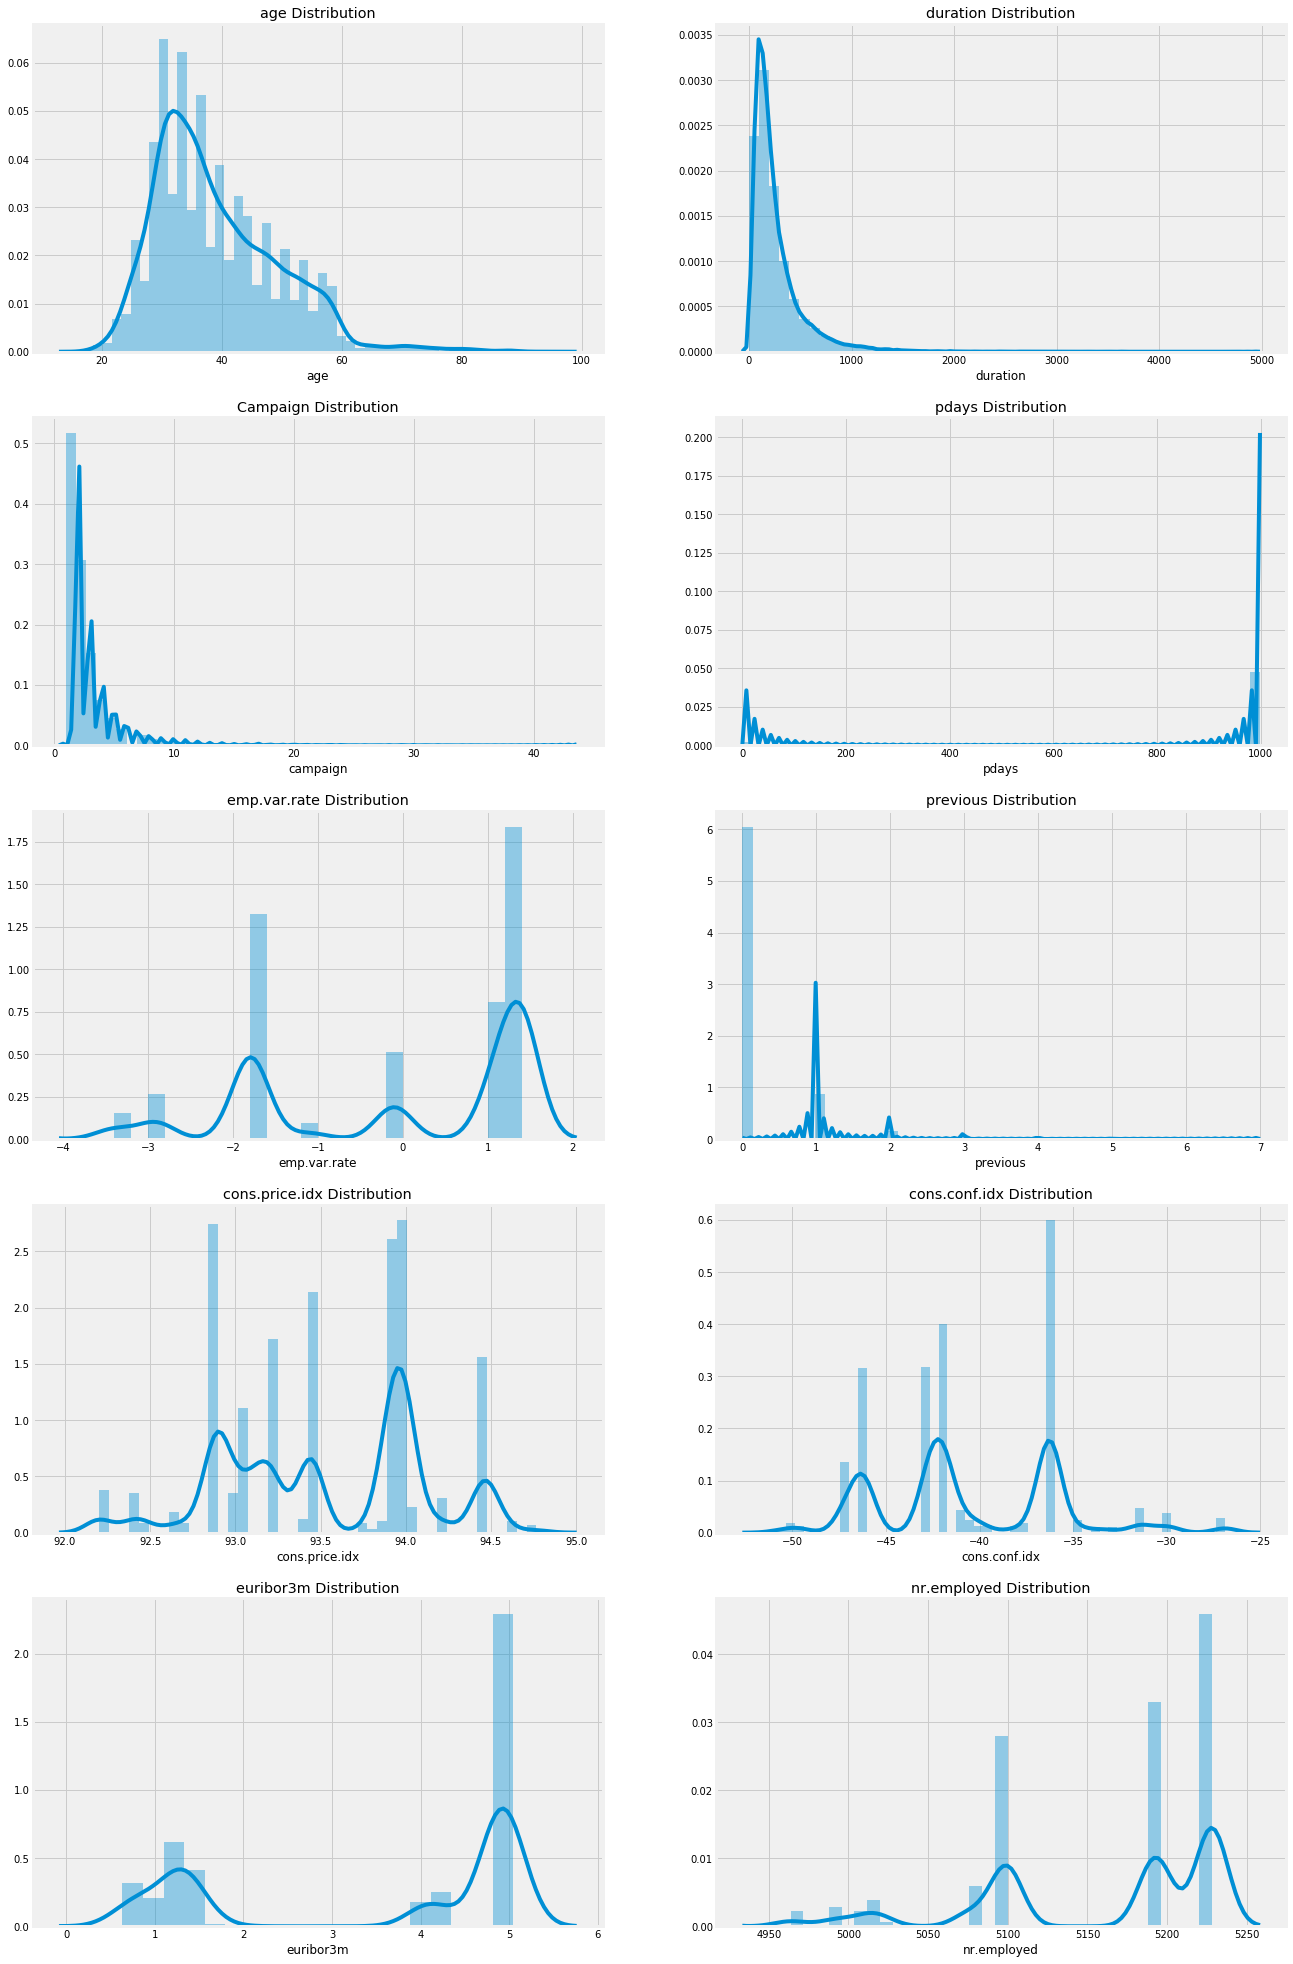

In [20]:
# visulaizing numerical variables
figsize = (10,25)
'age',

plt.figure(figsize=(20,35))

plt.subplot(5,2,1)
plt.title('age Distribution')
sb.distplot(data.age)

plt.subplot(5,2,2)
plt.title('duration Distribution')
sb.distplot(data.duration)

plt.subplot(5,2,3)
plt.title('Campaign Distribution')
sb.distplot(data.campaign)

plt.subplot(5,2,4)
plt.title('pdays Distribution')
sb.distplot(data.pdays)

plt.subplot(5,2,5)
plt.title('emp.var.rate Distribution')
sb.distplot(data['emp.var.rate'])

plt.subplot(5,2,6)
plt.title('previous Distribution')
sb.distplot(data.previous)

    
plt.subplot(5,2,7)
plt.title('cons.price.idx Distribution')
sb.distplot(data['cons.price.idx'])

plt.subplot(5,2,8)
plt.title('cons.conf.idx Distribution')
sb.distplot(data['cons.conf.idx'])

plt.subplot(5,2,9)
plt.title('euribor3m Distribution')
sb.distplot(data.euribor3m)

plt.subplot(5,2,10)
plt.title('nr.employed Distribution')
sb.distplot(data['nr.employed'])

plt.show()

Most variables dont have a normal distribution, we can see the presence of outliers in the data 

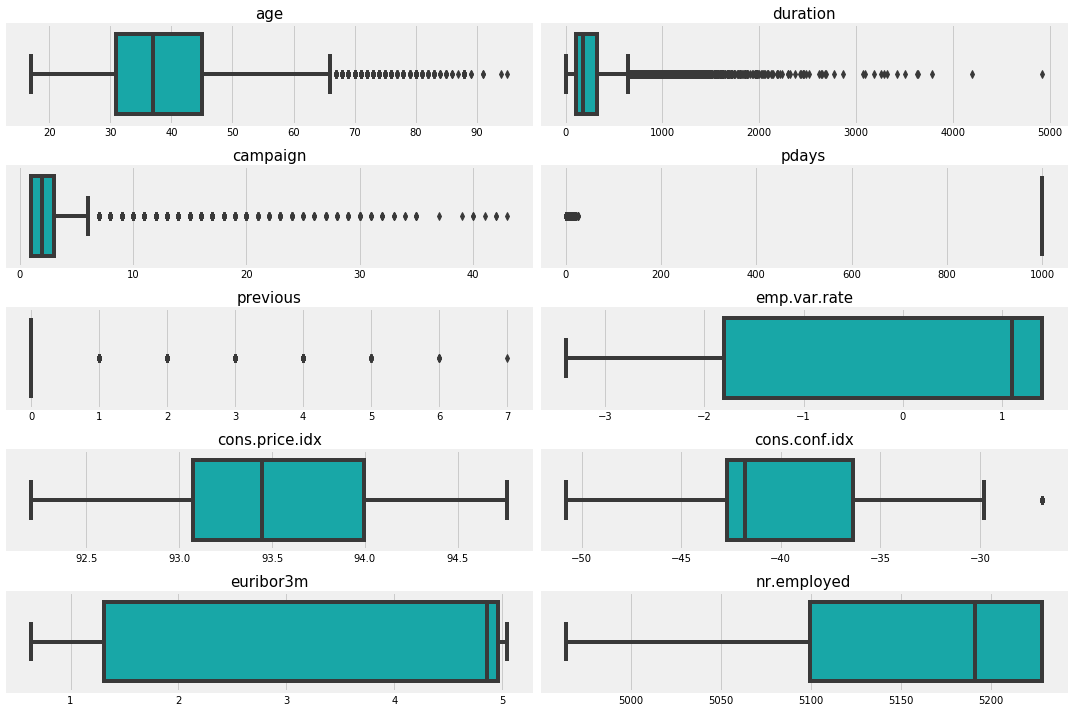

In [21]:
# Checking for outliers


fig, ax  = plt.subplots(5,2,figsize = (18,15))
count = 0
cols = data.select_dtypes(include = np.number)
cols = cols.columns
for i in range(5):
    for j in range(2):
        s = cols[count+j]
        sb.boxplot(data[s].values,ax = ax[i][j],color = 'c')
        ax[i][j].set_title(s,fontsize = 15)
        fig = plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count = count+j+1



WE can see certain number of Outliers in 'age', 'duration', 'campaign' etc..
But its important to note that since this is a sensitive Bank Dataset the above columns should be treated as 'Extreme values' which provides important insights and not 'Outliers

Skewness

is the degree of distortion from the symmetrical bell curve or the normal curve. So, a symmetrical distribution will have a skewness of "0". There are two types of Skewness: Positive and Negative. Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. Negative Skewness means the tail on the left side of the distribution is longer and fatter. In negative Skewness the mean and median will be less than the mode. Skewness differentiates in extreme values in one versus the other tail. Here is a picture to make more sense.

In [22]:
# Calculate the Skewed value of each variable

for i in num_cols:
    print(f"Skewness {i} : " + str(data[i].skew()))

Skewness age : 0.9802100594305216
Skewness duration : 3.3895760594757802
Skewness campaign : 4.896935174352032
Skewness pdays : -4.507904504882473
Skewness previous : 3.5946072353163
Skewness emp.var.rate : -0.5489200845738652
Skewness cons.price.idx : -0.1187247500320943
Skewness cons.conf.idx : 0.373946969377056
Skewness euribor3m : -0.525050282109819
Skewness nr.employed : -0.8937557149000335


As you can see the most skew varibale is the campaign followed by the duration solution np.log1p